In [2]:
#Import the appropriate packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.filters import sobel
from skimage.color import rgb2gray

In [ ]:
#Import Image
image = cv2.imread("images/test_2.jpg")

In [ ]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

#### K-means clustering for image segmentation

In [ ]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(segmented_image)

In [ ]:
# convert to 2d array
img2d = image[:,:,:3].reshape((image.shape[0]*image.shape[1],image.shape[2]))

In [ ]:
# create an object of the classifier and train it
cl = KMeans(n_clusters=4)
param = cl.fit(img2d)

In [ ]:
# get the labels of the classes and reshape it x-y-bands shape order (one band only)
img_cl = cl.labels_
img_cl = img_cl.reshape(image[:,:,0].shape)

To show the resulting image, we use a custom color map where you can control the color of each class. 

In [ ]:
# Create a custom color map to represent our 4 different classes
cmap = mc.LinearSegmentedColormap.from_list("", ["#B90E0A","navy","green","#E1AD01"])

In [ ]:
# Show the resulting array and save it as jpg image
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_cl, cmap=cmap)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)
plt.show()

#### Overview of different segmentation methods

In [ ]:
#img = img_as_float(image()[::2, ::2])

segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(image))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Compact Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(image, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(image, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(image, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(image, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

#### Fine tuning of slic segementation (seemed most promising)

SLIC number of segments: 393


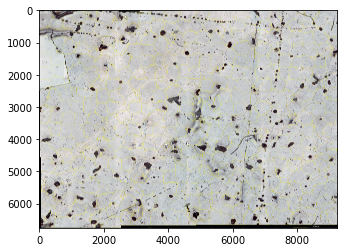

In [56]:
segments_slic = slic(image, n_segments=500, compactness=10, sigma=1,
                     start_label=1)

print(f'SLIC number of segments: {len(np.unique(segments_slic))}')

fig = plt.imshow(mark_boundaries(image, segments_slic))
plt.savefig('slic_comp_2.png', dpi=600)

#### Edge detection

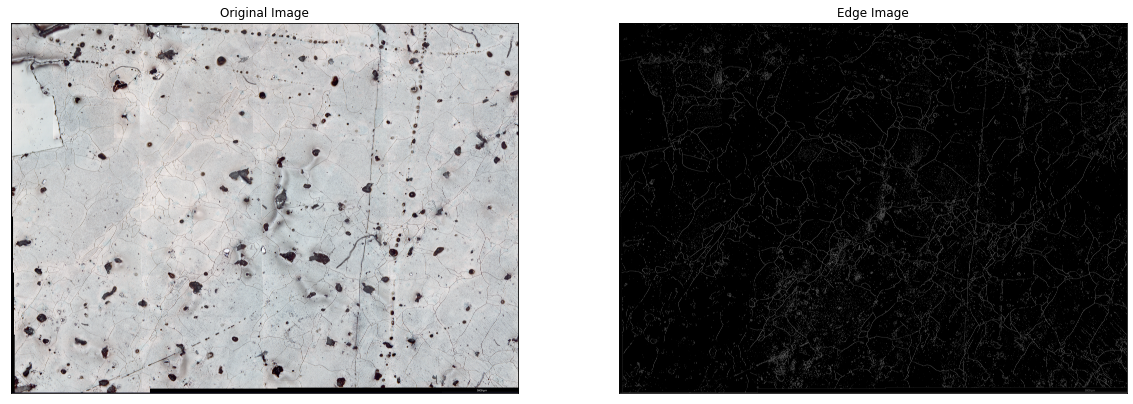

In [51]:
edges = cv2.Canny(image,150,200)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [8]:
# reading the image
img = imread('Images/test.png')

/var/folders/w1/8w95xs995fq6kp4j2z6hpsn80000gn/T/ipykernel_3261/3569427424.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=1, pixels_per_cell=(2, 2),


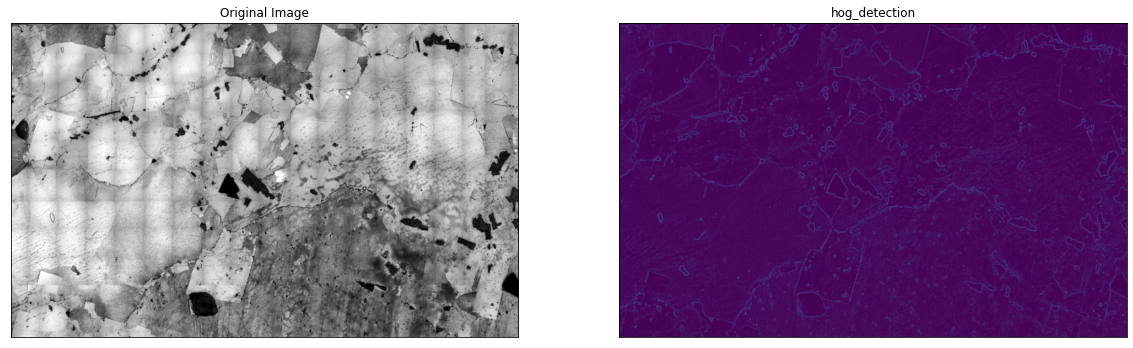

In [10]:
#creating hog features
fd, hog_image = hog(img, orientations=1, pixels_per_cell=(2, 2),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

				
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(hog_image)
plt.title('hog_detection'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# Settings: pixels_per_cell is by far the most important setting (choose 2,2), all the other settings seems to play no influence on the 
# output, multichannel and visualize need to be set to true
# fd1 is a flattened numpy array with ??? grayscale values or vector directions?
# For large images this can take some time

#creating hog features
fd_1, hog_image_1 = hog(img, orientations=1, pixels_per_cell=(2, 2),
                	visualize=True, multichannel=True)
#{'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
fd_2, hog_image_2 = hog(img, orientations=1, pixels_per_cell=(2, 2),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(hog_image_1, cmap='gray')
plt.title('Hog_setting_1'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(hog_image_2,cmap = 'gray')
plt.title('Hog_setting_2'), plt.xticks([]), plt.yticks([])
plt.show()

/var/folders/w1/8w95xs995fq6kp4j2z6hpsn80000gn/T/ipykernel_3261/1027322425.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_1, hog_image_1 = hog(img, orientations=1, pixels_per_cell=(2, 2),


KeyboardInterrupt: 

In [4]:
plt.imshow(hog_image_2,cmap = 'gray')

NameError: name 'hog_image_2' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Felzenszwalb number of segments: 4054
SLIC number of segments: 240
Compact Watershed number of segments: 240


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


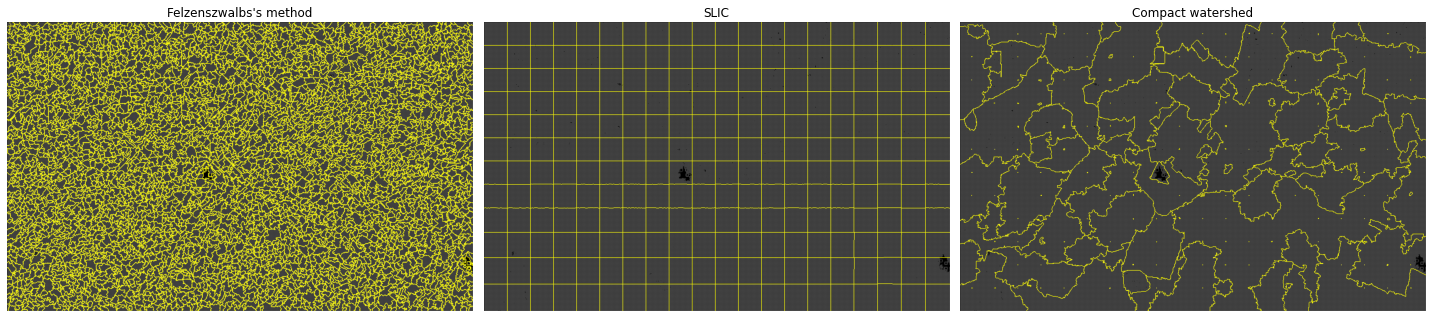

In [54]:
image = hog_image_2

segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
gradient = sobel(image)
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Compact Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)

ax[0].imshow(mark_boundaries(image, segments_fz))
ax[0].set_title("Felzenszwalbs's method")
ax[1].imshow(mark_boundaries(image, segments_slic))
ax[1].set_title('SLIC')
ax[2].imshow(mark_boundaries(image, segments_watershed))
ax[2].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()